In [1]:
import numpy as np
from PIL import Image
from pylab import *

# Set Folder Path, Scan and Starting Position
PATH = r'C:\Users\mrand\Desktop\SENG4120A Indivdual Project Files\ScanData'
SCAN = '\RedJellyWholeSample_X17@1.0_Y13@0.25_T180@10_1610133453'
STARTINGPOS = float(127)

# Get scan's XYZ range and step size from scan name
scanData = SCAN.split('_')
scanName = scanData[0]

xRange = float(scanData[1].split('@')[0].replace('X',''))
xStepSize = float(scanData[1].split('@')[1])
xSteps = xRange / xStepSize + 1 # Set to +1 or +0 depending on if an extra step was set in the scan 

yRange = float(scanData[2].split('@')[0].replace('Y',''))
yStepSize = float(scanData[2].split('@')[1])
ySteps = yRange / yStepSize + 1 # Set to +1 or +0 depending on if an extra step was set in the scan 

thetaRange = float(scanData[3].split('@')[0].replace('T',''))
thetaStepSize = float(scanData[3].split('@')[1])
thetaSteps = thetaRange / thetaStepSize + 1 # Set to +1 or +0 depending on if an extra step was set in the scan 
thetaArray = np.linspace(0,int(thetaRange),int(thetaSteps))

print('Scan = ' + scanName)
print('X = ' + str(xRange) + ' @ ' + str(xStepSize) + ' = ' + str(xSteps) + ' steps')
print('Y = ' + str(yRange) + ' @ ' + str(yStepSize) + ' = ' + str(ySteps) + ' steps')
print('Theta = ' + str(thetaRange) + ' @ ' + str(thetaStepSize) + ' = ' + str(thetaSteps) + ' steps')

# Create Sinogram Array
sinogram_array = np.empty([int(xSteps),int(ySteps),int(thetaSteps)],dtype=np.uint8)

# summarize shape
print(sinogram_array.shape)

Scan = \RedJellyWholeSample
X = 17.0 @ 1.0 = 18.0 steps
Y = 13.0 @ 0.25 = 53.0 steps
Theta = 180.0 @ 10.0 = 19.0 steps
(18, 53, 19)


# Create Sinograms

In [2]:
# Create each sinogram and fill the graph with the approximated data
nullxPos = str("{:.2f}".format(float(STARTINGPOS + xRange),2))
for x in range(int(xSteps)):
    xPos = str("{:.2f}".format(float(STARTINGPOS + (x * xStepSize)),2))
    print(xPos)
    for y in range(int(ySteps)):
        yPos = str("{:.2f}".format(float(y*yStepSize),2))
        for theta in range(int(thetaSteps)):
            thetaPos = str(int(theta*thetaStepSize)) 
            
            # load the projection image
            image = Image.open(PATH + SCAN + '\XYT_' + xPos + '_' + yPos + '_' + thetaPos + '.jpg').convert('L')
            
            # load the image with no sample (and therefore no absorption)
            null_image = Image.open(PATH + SCAN + '\XYT_' + nullxPos + '_' + yPos + '_' + thetaPos + '.jpg').convert('L')
            
            # Convert images to numpy array
            image_array = asarray(image)
            null_image_array = asarray(null_image)
            
            # Sum all intensities (pixel values) of image and null image
            imageSum = np.sum(image_array)
            nullSum = np.sum(null_image_array)
            
            # Find approximate image absorption
            totalSum = imageSum / nullSum;
            
            # Create Sinogram Array
            sinogram_array[x][y][theta] = totalSum
 

127.00
128.00
129.00
130.00
131.00
132.00
133.00
134.00
135.00
136.00
137.00
138.00
139.00
140.00
141.00
142.00
143.00
144.00


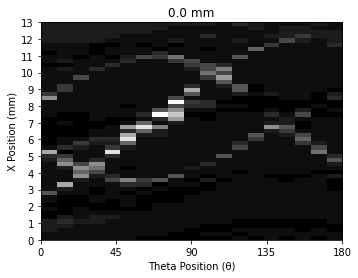

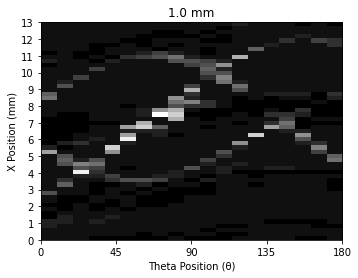

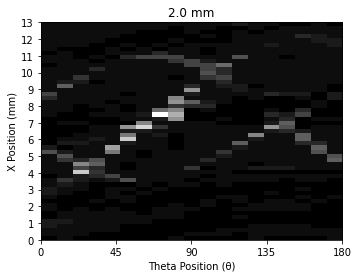

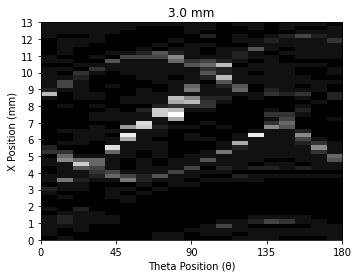

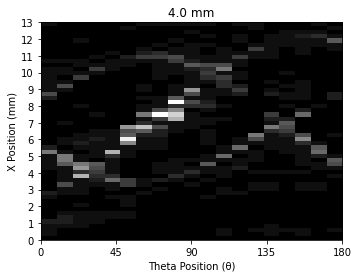

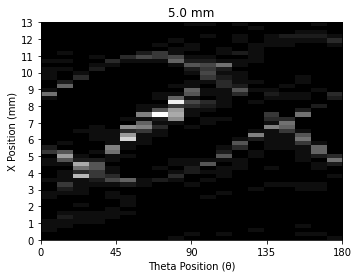

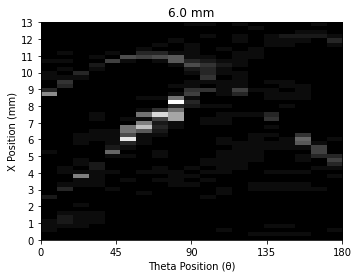

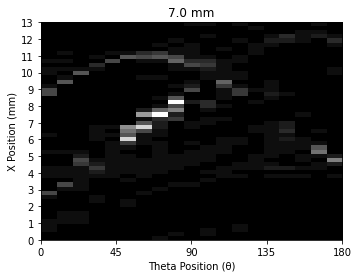

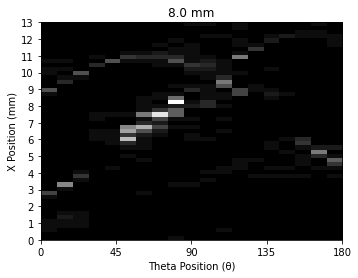

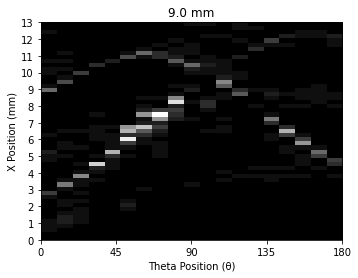

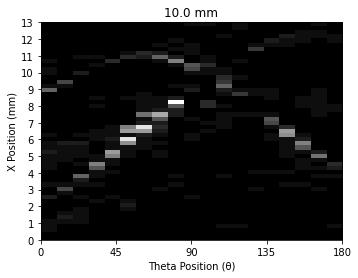

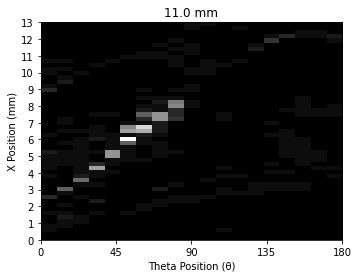

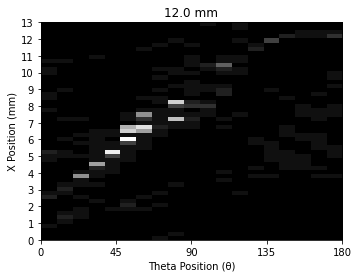

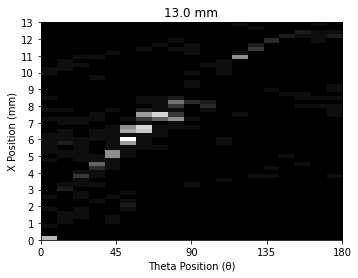

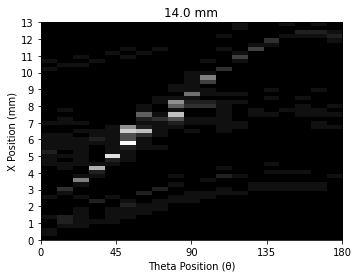

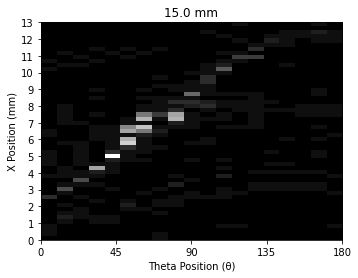

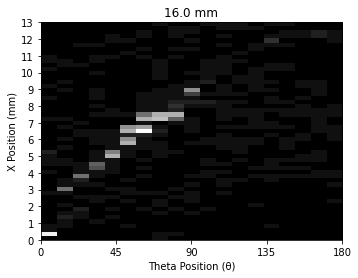

In [17]:
import os

# Create save directory
# if not os.path.isdir(PATH+SCAN+'\Sinograms\\'):
#     os.makedirs(PATH+SCAN+'\Sinograms\\')
    
# Create Sinograms
for x in range(int(xSteps-1)):
    fig, ax = plt.subplots(1,1)
    img = ax.imshow(sinogram_array[x],cmap='gray',extent=[0, 18, 0, 13])
    
    plt.title(str(x*xStepSize) + ' mm')

    x_label_list = ['0','45','90','135','180']
    ax.set_xticks([0,4.5,9,13.5,18])
    ax.set_xticklabels(x_label_list)
    
    y_label_list = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13']
    ax.set_yticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13])
    ax.set_yticklabels(y_label_list)

    plt.xlabel('Theta Position (θ)')
    plt.ylabel('X Position (mm)')
    plt.savefig(PATH+SCAN+'\Sinograms\\' + str(x*xStepSize) + 'mm.png')
    plt.show()


In [18]:
# Create Reconstructions using Filtered Back Projection (FBP)
from skimage.transform import iradon

reconstructions_array = np.empty([int(xSteps),60,60],dtype=float)

for x in range(int(xSteps)):
    reconstructions_array[x] = iradon(sinogram_array[x], theta=thetaArray,circle=False,interpolation='cubic',filter_name='hann',output_size=60)

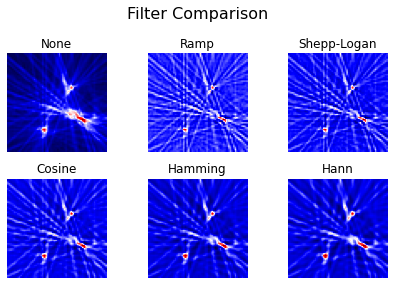

In [46]:
# Filter Comparison
from skimage.transform import iradon

filters = ['ramp', 'shepp-logan', 'cosine', 'hamming', 'hann',]

fig, axes = plt.subplots(2, 3)
fig.suptitle('Filter Comparison', fontsize=16)
ax = axes.ravel()

# NONE
ax[0].set_title("None")
reconstruction = iradon(sinogram_array[5], theta=thetaArray,circle=False,interpolation='cubic',filter_name=None,output_size=60)
ax[0].imshow(reconstruction,cmap='seismic')
ax[0].axis('off')

# Ramp
ax[1].set_title("Ramp")
reconstruction = iradon(sinogram_array[5], theta=thetaArray,circle=False,interpolation='cubic',filter_name='ramp',output_size=60)
ax[1].imshow(reconstruction,cmap='seismic')
ax[1].axis('off')

# Shepp-logan
ax[2].set_title("Shepp-Logan")
reconstruction = iradon(sinogram_array[5], theta=thetaArray,circle=False,interpolation='cubic',filter_name='shepp-logan',output_size=60)
ax[2].imshow(reconstruction,cmap='seismic')
ax[2].axis('off')

# Cosin
ax[3].set_title("Cosine")
reconstruction = iradon(sinogram_array[5], theta=thetaArray,circle=False,interpolation='cubic',filter_name='cosine',output_size=60)
ax[3].imshow(reconstruction,cmap='seismic')
ax[3].axis('off')

# Hamming
ax[4].set_title("Hamming")
reconstruction = iradon(sinogram_array[5], theta=thetaArray,circle=False,interpolation='cubic',filter_name='hamming',output_size=60)
ax[4].imshow(reconstruction,cmap='seismic')
ax[4].axis('off')

# Hann
ax[5].set_title("Hann")
reconstruction = iradon(sinogram_array[5], theta=thetaArray,circle=False,interpolation='cubic',filter_name='hann',output_size=60)
ax[5].imshow(reconstruction,cmap='seismic')
ax[5].axis('off')

fig.tight_layout()
           
plt.savefig(PATH+'\Filter Comparison Using Red Jelly.png')
plt.show()

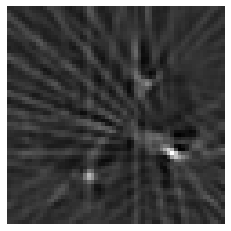

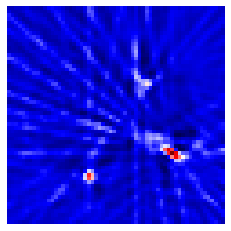

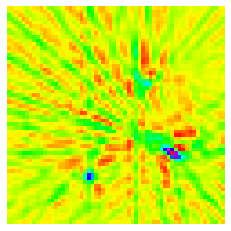

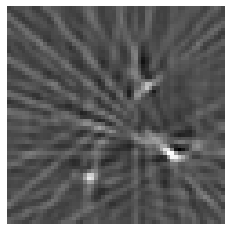

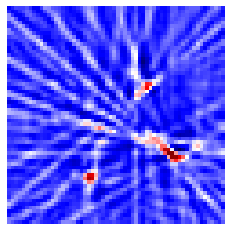

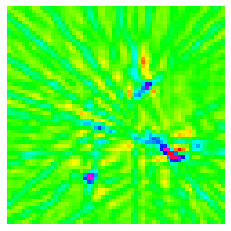

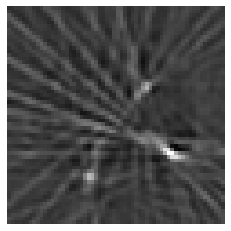

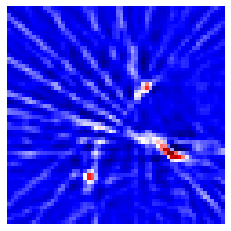

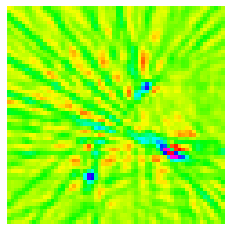

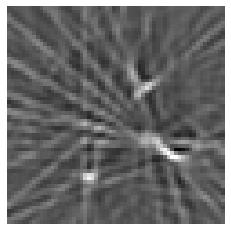

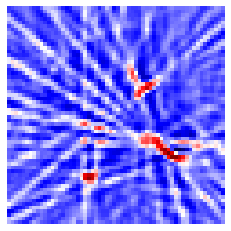

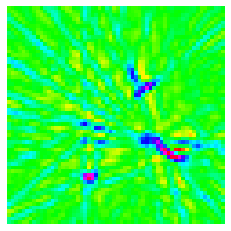

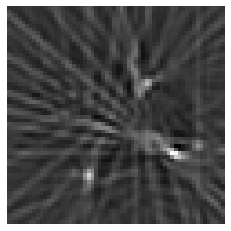

OSError: [Errno 22] Invalid argument: 'C:\\Users\\mrand\\Desktop\\SENG4120A Indivdual Project Files\\ScanData\\RedJellyWholeSample_X17@1.0_Y13@0.25_T180@10_1610133453\\Reconstructions\\Balls_4.0mm.png'

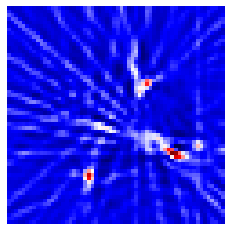

In [38]:
# Create save directory
if not os.path.isdir(PATH+SCAN+'\Reconstructions\\'):
    os.makedirs(PATH+SCAN+'\Reconstructions\\')

# Plot the reconstructions
for x in range(int(xSteps-1)):
    plt.imshow(reconstructions_array[x], cmap='gray')
    plt.axis('off')
    plt.savefig(PATH+SCAN+'\Reconstructions\\' + str(x*xStepSize) + 'mm.png')
    plt.show()
    
    plt.imshow(reconstructions_array[x], cmap='seismic')
    plt.axis('off')
    plt.savefig(PATH+SCAN+'\Reconstructions\\' + 'Balls_' + str(x*xStepSize) + 'mm.png')
    plt.show()
    
    plt.imshow(reconstructions_array[x], cmap='hsv')
    plt.axis('off')
    plt.savefig(PATH+SCAN+'\Reconstructions\\' + 'Ring_' + str(x*xStepSize) + 'mm.png')
    plt.show()
    

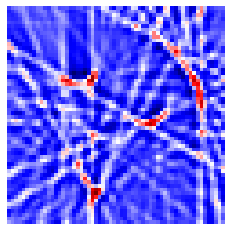

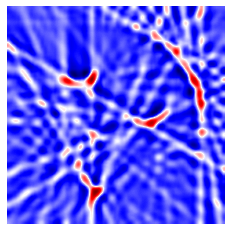

In [75]:
# Smooth Reconstruction using interpolation
x = 5

plt.imshow(reconstructions_array[x], cmap='seismic')
plt.axis('off')
plt.show()

import cv2
img_out= cv2.resize(reconstructions_array[x], dsize=(200,200),interpolation=cv2.INTER_CUBIC) 

plt.imshow(img_out, cmap='seismic')
plt.axis('off')
plt.show()


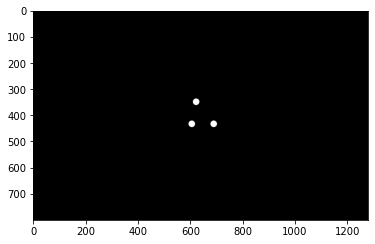

(180, 180)


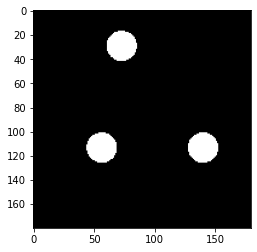

In [12]:
# Comparison 
from skimage.transform import radon, rescale, downscale_local_mean, rotate
from skimage.util import crop

# Load a reference image
image = Image.open(r'C:\Users\mrand\Desktop\SENG4120A Indivdual Project Files\ScanData\Comparison Slices\out0128.png').convert('L')

# convert image to numpy array
image_array = asarray(image)

plt.imshow(image_array, cmap='gray')
plt.show()

# convert image to numpy array
image_array = crop(image_array,((320,300),(550,550)))

print(image_array.shape)

plt.imshow(image_array, cmap='gray')
plt.show()

# scaled_array = downscale_local_mean(image_array, (5.5,5.5))

# scaled_array = rotate(scaled_array,45)
# print(scaled_array.shape)
# plt.imshow(scaled_array, cmap='gray')
# plt.show()


# Model Image and a Sinogram


[0.0000000e+00 2.8125000e-01 5.6250000e-01 ... 3.5915625e+02 3.5943750e+02
 3.5971875e+02]


C:\Users\mrand\anaconda3\lib\site-packages\skimage\transform\radon_transform.py:83: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


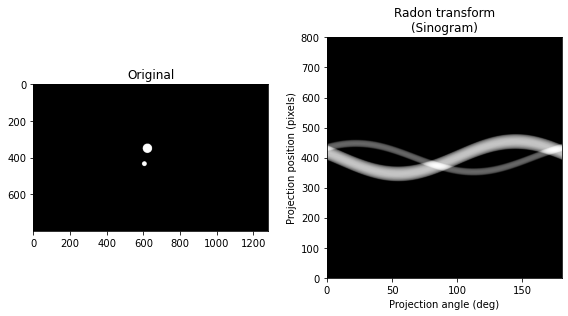

In [16]:
from skimage.transform import radon, rescale

# Load a reference image
image = Image.open(r'C:\Users\mrand\Desktop\SENG4120A Indivdual Project Files\ScanData\Comparisons Slices\out0020.png').convert('L')

# convert image to numpy array
image_array = asarray(image)

theta = np.linspace(0., 180., max(image_array.shape), endpoint=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))

ax1.set_title("Original")
ax1.imshow(image_array, cmap=plt.cm.Greys_r)

theta = np.linspace(0., 360., max(image_array.shape), endpoint=False)
print(theta)
sinogram = radon(image_array, theta=theta)
dx, dy = 0.5 * 180.0 / max(image_array.shape), 0.5 / sinogram.shape[0]
ax2.set_title("Radon transform\n(Sinogram)")
ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)")
ax2.imshow(sinogram, cmap=plt.cm.Greys_r,
           extent=(-dx, 180.0 + dx, -dy, sinogram.shape[0] + dy),
           aspect='auto')

fig.tight_layout()
plt.show()

In [18]:
print(max(image_array.shape))
theta = np.linspace(0., 360., max(image_array.shape), endpoint=False  )
print(theta[1279])

1280
359.71875


# Scale Down Sinogram 

(800, 1280)


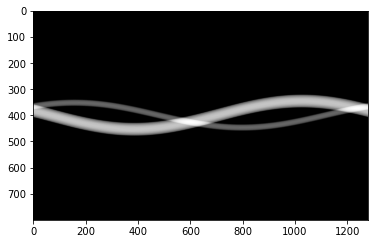

(27, 18)


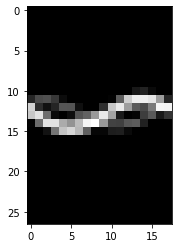

In [17]:
from skimage.measure import block_reduce

print(sinogram.shape)
plt.imshow(sinogram, cmap=plt.cm.Greys_r)
plt.show()

# Resize smoothly down to 16x16 pixels 27 18
scaled_array = block_reduce(sinogram, block_size=(30,72), func=np.sum)
print(scaled_array.shape)

plt.imshow(scaled_array, cmap=plt.cm.Greys_r)
plt.show()


# Reconstruct using Sinogram

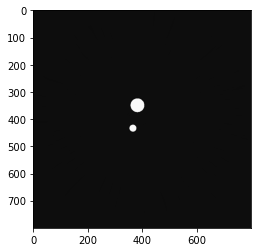

In [18]:
from skimage.transform import iradon_sart

reconstruction_sart = iradon_sart(sinogram, theta=theta)

plt.imshow(reconstruction_sart, cmap=plt.cm.Greys_r)